
### Source code for this blog post 
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/) is a link to the source code for this Kernel Logistic Regression blog post.

### Reference for this blog post
[Here](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-kernel-logistic.html) is a link to the main reference we are using when creating this blog post.

# Introduction.
In this blog post I am going to discuss kernel logistic regression for binary classification. 



Recall the empirical risk minimization problem, which is finding the weight vector `w` that minimize the loss function $L(w)$.
#### $$ \hat{w} = \arg \min_{w} L(w), $$ 
where the loss function $L(w)$ is of the following form:
#### $$ L(w) = \frac{1}{n} \sum_{i=1}{n} \ell( \langle w, x_i \rangle, y_i ), $$
and $\ell (\hat{y}, y ) $ is the logistic loss from the previous blog post. However, previously, we only studied *linear decision boundaries*, and now we want to study nonlinear patterns.

In [31]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, let's import some libraries, and let's create an artificial data set that has nonlinear patterns.

In [23]:

# from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (4,4)
import numpy as np
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
np.seterr(all="ignore")


{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

How to deal with the nonlinear pattern we see here? it seems a linear separator like a straight line will not do a satisfactory job here. Hence, we introduce the *kernel logistic regression*, which we are going to implement now. 

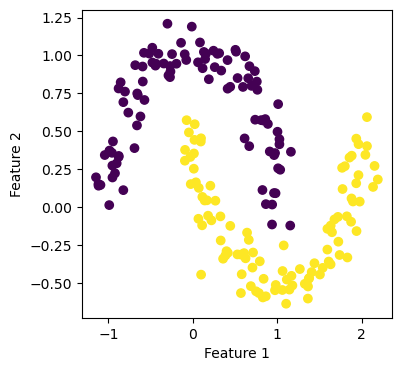

In [22]:
X, y = make_moons(200, shuffle = True, noise = 0.1)
plt.scatter(X[:,0], X[:,1], c = y)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")
# LR = LogisticRegression()
# LR.fit(X, y)
# plot_decision_regions(X, y, clf = LR)
# title = plt.gca().set(title = f"Accuracy = {(LR.predict(X) == y).mean()}",
#                       xlabel = "Feature 1", 
#                       ylabel = "Feature 2")

## Try on a tiny example 
To start us off, we manually create a tiny data set, and we call the `fit` function that we implemented in the source code (link at the start of the blog). This will help us to see clearly where our implementation works or not, and using a tiny test data set also helps for debugging purposes.

[1 1 0 0 0 0 1 0 1 1]


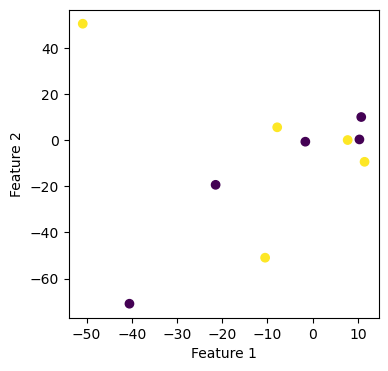

In [12]:
XX = np.array([
[-50.84739307, 50.71154296],
 [ 11.46814927, -9.28580296],
 [ -40.5192833,   -70.94984582],
 [ 10.73327397,  10.17310931],
 [ 10.33197143,  0.43375035],

 [ -1.62726102, -0.54736954],
[-7.84739307, 5.71154296],
 [ -21.46814927, -19.28580296],
 [ -10.5192833,   -50.94984582],
 [ 7.73327397,  0.17310931],
])
yy = np.array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1])
print(yy)
plt.scatter(XX[:,0], XX[:,1], c = yy)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")

It seems that those $10$ data points does not display a linear pattern, which is what we want. Now we create an instance of the `KLR` class and test our `fit` function to see if it could classify according to nonlinear patterns.

In [13]:
from sklearn.metrics.pairwise import rbf_kernel
from kernel_logistic import KLR 
KLR = KLR(rbf_kernel )
KLR.fit(XX, yy)

In [14]:
print(XX)

[[-50.84739307  50.71154296]
 [ 11.46814927  -9.28580296]
 [-40.5192833  -70.94984582]
 [ 10.73327397  10.17310931]
 [ 10.33197143   0.43375035]
 [ -1.62726102  -0.54736954]
 [ -7.84739307   5.71154296]
 [-21.46814927 -19.28580296]
 [-10.5192833  -50.94984582]
 [  7.73327397   0.17310931]]


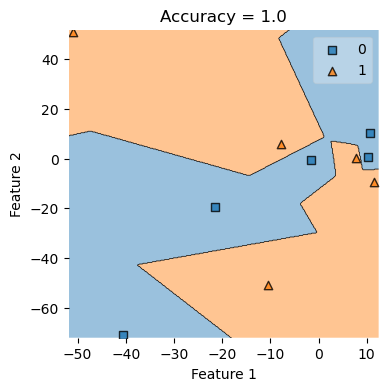

In [15]:
plot_decision_regions(XX, yy, clf = KLR)
mypredict = KLR.predict(XX)
title = plt.gca().set(title = f"Accuracy = {(mypredict == yy).mean()}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

In [16]:
print(KLR.predict(XX))
print(yy)

[1 1 0 0 0 0 1 0 1 1]
[1 1 0 0 0 0 1 0 1 1]


## Try on a bigger example

[0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1
 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 1 1 0 0]
OMG
[0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0
 1 0 1 1 0 1]


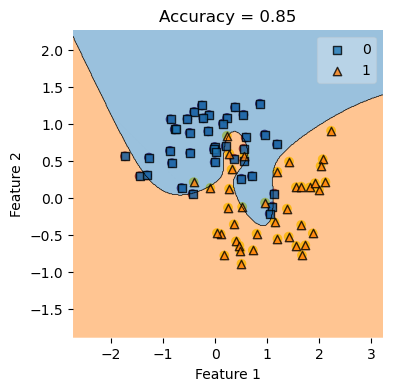

In [26]:

np.random.seed(42)
np.seterr(all="ignore")

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

X, y = make_moons(80, shuffle = True, noise = 0.3)
plt.scatter(X[:,0], X[:,1], c = y)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")

KLR.fit(X, y)


plot_decision_regions(X, y, clf = KLR)
yourpredict = KLR.predict(X)
title = plt.gca().set(title = f"Accuracy = {(yourpredict == y).mean()}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

print(KLR.predict(X))
print("OMG")
print(y)

In [40]:
print(KLR.v)

[ -622.23496279  1335.13521946   681.20950851 -1284.34485486
  -525.72085209   333.19420805]


## Let's try a different data set

[0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 1 0 0]
OMG
[0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1
 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 1 0 0]


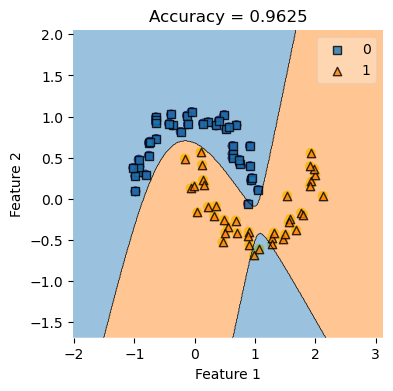

In [27]:

X, y = make_moons(80, shuffle = True, noise = 0.1)
plt.scatter(X[:,0], X[:,1], c = y)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")

KLR.fit(X, y)

# plot the graph
plt.scatter(X[:,0], X[:,1], c = y)
labels = plt.gca().set(xlabel = "Feature 1", ylabel = "Feature 2")



plot_decision_regions(X, y, clf = KLR)
yourpredict = KLR.predict(X)
title = plt.gca().set(title = f"Accuracy = {(yourpredict == y).mean()}",
                      xlabel = "Feature 1", 
                      ylabel = "Feature 2")

print(KLR.predict(X))
print("OMG")
print(y)